# СОЦИАЛЬНЫЕ МЕДИА

In [1]:
with open('files/corrected_sents.txt') as f:
    contents = [x.strip() for x in f.readlines()]
with open('files/source_sents.txt') as f:
    source = [x.strip() for x in f.readlines()]

In [2]:
contents[:10]

['очень классная тетка кто бы что ни говорил',
 'Может выгоднее втулку продать и купить колесо в сборе',
 'Довольно большая часть пришедших сходила с дорожек и усаживалась на траву',
 'Симпатичнейшее шпионское устройство такой себе гламурный фотоаппарат девушки Бонда миниатюрная модель камеры Superheadz Clap Camera',
 'Апофеозом дня для меня сегодня стала фраза услышанная в новостях',
 'Ну не было поста так не было',
 'Хотя странно когда я забирала к себе на выходные старого кота который живет у родителей да и собаку в придачу то такого концерта мой кот не устраивал',
 'Думаю что лет через 10 ретроспективно просматривать это будет мне невероятно интересно',
 'Зато я считаю что это будет полезно и для меня и для всех тех кто меня окружает ведь когда расстаешься с человеком на какое-то время то многое становится прозрачным я имею ввиду мы начинаем понимать какое место в нашей повседневности занимает этот человек',
 'Поясним эту мысль']

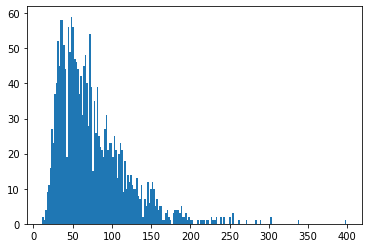

In [3]:
from matplotlib import pyplot as plt
plt.hist(list(map(len,contents)), bins=200);

In [4]:
max(list(map(len,contents)))

399

In [6]:
import pandas as pd

pd.DataFrame({'source':source, 'target': contents}).to_csv('data/dataset.csv')

# СУБТИТРЫ

In [1197]:
count =0
subs = []
counts = [0 for i in range(7)]
with open('files/OpenSubtitles.en-ru.ru') as f:
    while True:
        line = f.readline().strip()
        if not line:
            break
        for i in range(7):
            if ((len(line)<=50+i*50) and(len(line)>i*50)):
                if (counts[i]<=2250):
                    subs.append(line)
                    counts[i]+=1
            elif(len(line)>6*50 and len(line)<600 ):
                subs.append(line)
                counts[-1]+=1
        if((sum(counts))%40000==0):
            print(counts)

In [1198]:
sum(counts)

18011

In [876]:
subs = set(subs)

In [1051]:
backslash = "\\'"
bad_list = list('*€¬#√@©e') + ['--']+['\xa0']+['ѕереводчики']+['ндхм']+['____________']

In [1052]:
bad_list

['*',
 '€',
 '¬',
 '#',
 '√',
 '@',
 '©',
 'e',
 '--',
 '\xa0',
 'ѕереводчики',
 'ндхм',
 '____________']

In [1054]:
bad_list
def bad(x):
    for i in bad_list:
        if i in x:
            return False
    return True
subs_ = list(filter(lambda x: bad(x), subs))

In [1055]:
subs_ = list(filter(lambda x: bad(x), subs))

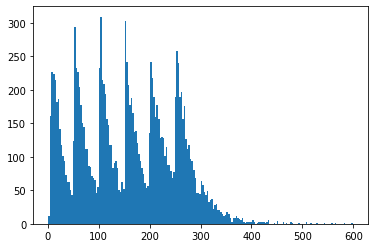

In [1058]:
plt.hist(list(map(len,subs)), bins=200);

# Новости

In [1061]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anastasiyagavrilova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import pandas as pd
df = pd.read_csv('files/news.csv',  usecols=['text'],nrows=20000)

In [ ]:
df.head()

In [1068]:
from unicodedata import normalize
# normalize('NFKD', s)
counts = [0 for i in range(7)]
sents_news = []
for i, text in df.iterrows():
    lines = nltk.tokenize.sent_tokenize(text['text'])
    for line in lines:
        for i in range(7):
            if ((len(line)<=50+i*50) and(len(line)>i*50)):
                if (counts[i]<=3500):
                    sents_news.append(normalize('NFKD', line))
                    counts[i]+=1
                    break
            elif(len(line)>6*50 and len(line)<600):
                sents_news.append(normalize('NFKD', line))
    if (sum(counts))>=7*2500:
        break
    if((sum(counts))%3000==0):
        print(counts)

[1146, 3480, 2586, 1219, 406, 124, 39]


In [1069]:
# sents = []
# from nltk import tokenize
# for i, text in df.iterrows():
#     sents +=tokenize.sent_tokenize(text['text'])

In [1196]:
sents_news = list(set(sents_news));

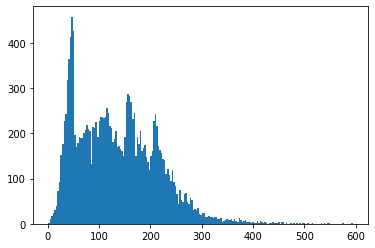

In [1072]:
plt.hist(list(map(len,sents_news)), bins=200);

In [1073]:
len(sents_news)

16814

# ЛИТЕРАТУРА

In [ ]:
df = pd.read_csv('files/zlatoust_paragraph_aligned_with_bleualign.csv', usecols=['source'])
df.head()

In [1077]:
counts = [0 for i in range(7)]
sents_litre = []
for i, text in df.iterrows():
    lines = nltk.tokenize.sent_tokenize(text['source'])
    for line in lines:
        for i in range(7):
            if ((len(line)<=50+i*50) and(len(line)>i*50)):
                if (counts[i]<=1500):
                    sents_litre.append(normalize('NFKD', line))
                    counts[i]+=1
                    break
            elif(len(line)>6*50 and len(line)<600):
                sents_litre.append(normalize('NFKD', line))
    if (sum(counts))>=7*2500:
        break
    if((sum(counts))%2000==0):
        print(counts)

[1010, 504, 262, 125, 53, 35, 11]
[1501, 1501, 1501, 820, 398, 185, 94]
[1501, 1501, 1501, 820, 398, 185, 94]
[1501, 1501, 1501, 820, 398, 185, 94]


In [1078]:
sents_litre = list(set(sents_litre))
sents_litre[:10] 

['Возвратясь в гостиную, они уселись втроем: старики вспомнили прежнее время и анекдоты своей службы, а Алексей размышлял о том, какую роль играть ему в присутствии Лизы.',
 'Ударилась плечом, выбежала на крыльцо и ослепла от яркого солнца.',
 'Мое сердце, после ваших слов, сжало какое-то предчувствие.',
 'Надо беспристрастно: свиньи, так и есть свиньи... Спасибо немцам за то, что побили... Ей-богу, спасибо.',
 'Тем самым, что и прежде, - тем, что русский либерал есть покамест еще нерусский либерал; больше ничем, по-моему.',
 'Да зачем?',
 '– Мы боялись даже за его жизнь.',
 'Почти не оставалось сил у русского народа для свободной творческой жизни, вся кровь шла на укрепление и защиту государства.',
 '- спрашивала генеральша, с недоумением и досадой оглядывая всех говоривших, но увидев, что Аглая вспыхнула, с сердцем прибавила: - Вздор какой-нибудь!',
 'Однажды ее пригласили на вечер.']

In [1079]:
len(sents_litre)

7255

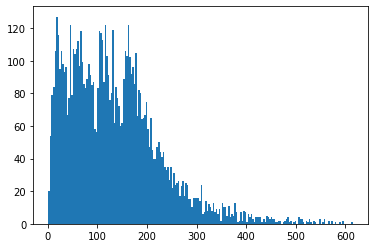

In [1080]:
plt.hist(list(map(len,sents_litre)), bins=200);

# GAZETA

In [1187]:
import json
with open('gazeta_train.jsonl', 'r') as json_file:
    json_list = list(json_file)
texts = []
for json_str in json_list:
    result = json.loads(json_str)

    texts.append(result['text'])

In [1188]:
from nltk import sent_tokenize
sents = []
for text in texts:
    sents+= sent_tokenize(text)

In [1190]:
counts = [0 for i in range(9)]
sents_gazeta= []
for line in sents:
    for i in range(9):
        if ((len(line)<=50+i*50) and(len(line)>i*50)):
            if (counts[i]<=10000):
                if line not in sents_gazeta:
                    sents_gazeta.append( line)
                    counts[i]+=1
                    break
#         elif(len(line)>6*50 and len(line)<600):
#             sents_gazeta.append( line)
#     if (sum(counts))>=7*2500:
#         break
    if((sum(counts))%100000==0):
        print(counts)

In [1191]:
sents_gazeta[:10]

['Сегодня транспортный налог начисляется в зависимости от мощности автомобиля, причем цена для «сильных» машин выше, чем для малолитражек.',
 'Также ставку налога могут корректировать региональные власти: согласно Налоговому кодексу, базовый тариф, установленный правительством, может быть уменьшен в пять раз или увеличен до 10 раз.',
 'Сборы идут в региональные бюджеты, откуда растекаются на общие нужды.',
 'Транспортный налог — один из основных источников бюджетных доходов — предлагается направить исключительно на дорожные фонды.',
 'Так, автомобилисты будут понимать, за что они платят, а дорожники будут иметь гарантированный доход.',
 'Кроме налога дорожные фонды будут пополняться за счет бюджетных средств и проезда по платным дорогам.',
 'Более того, транспортный налог предлагается завуалировать в акцизы на бензин.',
 'Привычную и раздражающую систему ежегодной оплаты квитанции предлагается изменить, включив налог в стоимость топлива.',
 'Минэкономразвития говорит об удвоении акцизы

# Generate errors

In [1192]:
errors = pd.read_csv('files/orfo_and_typos.L1_5+PHON.csv', sep=';')
errors.head()

,CORRECT,MISTAKE,WEIGHT
0,болота,болотро,0.5000
1,болота,балото,0.2652
2,болота,боллото,0.0909
3,болота,болотоэ,0.0909
4,болото,палатаа,0.5000


In [1193]:
err.loc['ёжик', 'MISTAKE'],

(['пижик', 'ёжиу', 'рик', 'рижик', 'ёжиг'],)

In [1194]:
err = pd.DataFrame(errors.groupby('CORRECT').MISTAKE.apply(list))
err['WEIGHT'] = errors.groupby('CORRECT').WEIGHT.apply(list)
err.head()

,MISTAKE,WEIGHT
CORRECT,,
а,"[п, з, х, н, ъ, йф, йц, ооооо, ёёёёё, нд, кп, ...","[0.6667, 0.5833, 0.5833, 0.5556, 0.5, 0.5, 0.5..."
аб,"[аег, аон, афп, н, алр, алн, тьб, ато, аок]","[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]"
аба,"[абыра, амиа, лыба, абфы]","[0.5, 0.5, 0.5, 0.5]"
абажур,"[абожюр, обажур, абажюр, абожур, абвжур, обожур]","[0.5, 0.3333, 0.239, 0.1282, 0.1111, 0.101]"
аббревиатура,"[абревиатюра, абревиатура, абревеатура, абриви...","[0.25, 0.1528, 0.1528, 0.1111, 0.0556, 0.0556,..."


In [1195]:
from numpy.random import choice
def make_error(word):
    x = np.array(err.loc[word, 'WEIGHT'])
    x/x.sum()
    return choice(err.loc[word, 'MISTAKE'], 1,
                  p=x/x.sum())[0]
    

In [1113]:
make_error('жить')

'жет'

In [1114]:
'жить' in err.index

True

In [1115]:
np.random.rand()

0.622646813248237

In [1124]:
from string import ascii_letters

def validate(nickname):
    return all(map(lambda c: c in ascii_letters, nickname))

In [1126]:
validate('мааамаа')

False

In [1134]:
SOS = '\t' 
EOS = '*' 
chars = list('йцукенгшщзхъфывапролджэячсмитьбюёЙЦУКЕНГШЩЗХЪЭЖДЛОРПАВЫФЯЧСМИТЬБЮЁ')
REMOVE_CHARS = '[#$%"\+@<=>!&,-.?:;()*\[\]^_`{|}~/\d\t\n\r\x0b\x0c]'

import numpy as np 
import random
def add_spelling_errors(token, error_rate=0.22):
    if (validate(token)): # английские опечатки не исправляем
        return token
    
    assert(0.0 <= error_rate < 1.0)
    if len(token) < 2:
        return token
    rand = np.random.rand()
    if(rand>error_rate):
        return token
    prob = error_rate / 4.0
#     print(token)
    if token in err.index:
#         print('ДА')
        return make_error(token)
    elif rand < prob: # вставка лишнего символа
        random_char_index = np.random.randint(len(token))
        token = token[:random_char_index] + np.random.choice(chars) \
                + token[random_char_index + 1:]
    elif prob < rand < prob * 2: # пропуск символа

        random_char_index = np.random.randint(len(token))
        token = token[:random_char_index] + token[random_char_index + 1:]
    elif prob * 2 < rand < prob * 3: #замена символа
        random_char_index = np.random.randint(len(token))
        token = token[:random_char_index] + np.random.choice(chars) \
                + token[random_char_index:]
    elif prob * 3 < rand < prob * 4: # буквы поменяны местами
        random_char_index = np.random.randint(len(token) - 1)
        token = token[:random_char_index]  + token[random_char_index + 1] \
                + token[random_char_index] + token[random_char_index + 2:]

    return token

def add_errors(sent):
    tokens = sent.split(' ')
#     num_err = random.randint(1, max(1,len(sent)//20))
    for i in range(len(tokens)):
        tokens[i] = add_spelling_errors(tokens[i])
    return ' '.join(tokens)

In [1135]:
from random import shuffle
# shuffle(dataset)

In [1136]:
dataset =list(sents_litre[:]+sents_news[:]+subs_[:]+sents_gazeta)
shuffle(dataset)

In [1137]:
dataset = list(contents[:2000])+dataset

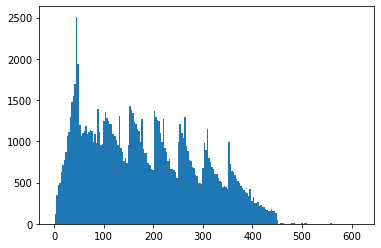

In [1138]:
plt.hist(list(map(len,dataset)), bins=200);

In [1154]:
bad_list = ['*',
 '€',
 '¬',
 '#',
 '√',
 '@',
 '©',
 'e',
 '--',
 '\xa0',
 'ѕереводчики',
 'ндхм',
 '____________'
           '+',
]

In [1155]:
bad_list.append('+')
def bad(x):
    for i in bad_list:
        if i in x:
            return False
    return True
dataset_ = list(filter(lambda x: bad(x), dataset))

In [1169]:
dataset = dataset_

In [1175]:
add_errors('Мы привыкли жить под пятой угнетателей.')

'ы привыкли жить под пятой угнетателей.'

In [1179]:
bad_sents=[]
for sent in dataset:
    bad_sents.append(add_errors(sent))

In [1180]:
bad_sents[2115]

'Утром 7 фераля  сообщалось  о якобы разоблачении анонимного пользователя форума «Двач», который рассказал, что работает анестезистом и убивает апциентов, отключая их от аппарата искусственной вентиляции легких.'

In [1184]:
pd.DataFrame({'source':bad_sents, 'target':dataset}).to_csv('data/dataset_big.csv')